In [220]:
import pandas as pd
import folium
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
%matplotlib inline

In [202]:
kc = pd.read_csv('KC_cities.csv')

In [203]:
kc.head()

,tabblk2010,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,...,stanrcname,necta,nectname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate
0,530330312021017,53,WA,Washington ...,53033,"King County, WA ...",53033031202,"312.02 (King, WA) ...",530330312021,"1 (Tract 312.02, King, WA) ...",...,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB ...,47.281505,-122.152278,2019-08-26
1,530330312022005,53,WA,Washington ...,53033,"King County, WA ...",53033031202,"312.02 (King, WA) ...",530330312022,"2 (Tract 312.02, King, WA) ...",...,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB ...,47.279386,-122.157441,2019-08-26
2,530330311002021,53,WA,Washington ...,53033,"King County, WA ...",53033031100,"311 (King, WA) ...",530330311002,"2 (Tract 311, King, WA) ...",...,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB ...,47.284217,-122.197750,2019-08-26
3,530330311002015,53,WA,Washington ...,53033,"King County, WA ...",53033031100,"311 (King, WA) ...",530330311002,"2 (Tract 311, King, WA) ...",...,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB ...,47.278259,-122.206612,2019-08-26
4,530330306002031,53,WA,Washington ...,53033,"King County, WA ...",53033030600,"306 (King, WA) ...",530330306002,"2 (Tract 306, King, WA) ...",...,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB ...,47.300098,-122.182180,2019-08-26


Firstly, we looked to identify the cities which are part of South King County. Based on information from Google, we found out that the following cities are a part of South King County:
Auburn, Burien, Covington, Des Monies, Enumclaw, Federal Way, Kent, Maple Valley, Normandy Park, Renton, Tukwikla, SeaTac, White Center, Boulevard Park and Vashon.
We used the following SQL query to extract a table with the PUMA IDs from the puma_names_2010 table.

In [ ]:
SELECT * FROM puma_names_2010
WHERE puma_name LIKE '%Auburn%'
OR puma_name LIKE '%Federal Way%'
OR puma_name LIKE '%Kent%'
OR puma_name LIKE '%Renton%'
OR puma_name LIKE '%Tukwila%'
OR puma_name LIKE '%Highline%';

,tabblk2010,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,...,stanrcname,necta,nectname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate
0,530330312021017,53,WA,Washington ...,53033,"King County, WA ...",53033031202,"312.02 (King, WA) ...",530330312021,"1 (Tract 312.02, King, WA) ...",...,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB ...,47.281505,-122.152278,2019-08-26
1,530330312022005,53,WA,Washington ...,53033,"King County, WA ...",53033031202,"312.02 (King, WA) ...",530330312022,"2 (Tract 312.02, King, WA) ...",...,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB ...,47.279386,-122.157441,2019-08-26
2,530330311002021,53,WA,Washington ...,53033,"King County, WA ...",53033031100,"311 (King, WA) ...",530330311002,"2 (Tract 311, King, WA) ...",...,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB ...,47.284217,-122.197750,2019-08-26
3,530330311002015,53,WA,Washington ...,53033,"King County, WA ...",53033031100,"311 (King, WA) ...",530330311002,"2 (Tract 311, King, WA) ...",...,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB ...,47.278259,-122.206612,2019-08-26
4,530330306002031,53,WA,Washington ...,53033,"King County, WA ...",53033030600,"306 (King, WA) ...",530330306002,"2 (Tract 306, King, WA) ...",...,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB ...,47.300098,-122.182180,2019-08-26


In [7]:
pum_was = pd.read_csv('puma_was.csv')

In [8]:
pum_was.head()

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,1,Alabama ...,14,1900,101900,G01001900,Lee County--Auburn City ...
1,1,Alabama ...,16,2300,102300,G01002300,"Coffee, Covington, Butler & Crenshaw Counties ..."
2,6,California ...,108,6103,606103,G06006103,Placer County (East/High Country Region)--Aubu...
3,10,Delaware ...,198,200,1000200,G10000200,Kent County--Dover City ...
4,17,Illinois ...,337,3531,1703531,G17003531,"Chicago City (South)--Auburn Gresham, Roseland..."


With the SQL query saved as a csv file, we loaded it into the Jupyter Notebook. We noticed that the SQL quewry gave a few cities outside Washington. In order to fix this, we filtered the dataframe using state_fips as 53, which is the id for Washinton. We then took the unique IDs in the 'puma' column of the table to identify the puma IDs for the cities we are interested in.

In [9]:
pum_was = pum_was[pum_was['state_fips'] == 53]

In [10]:
pum_was['puma'].unique()

array([11610, 11613, 11614, 11615, 11611, 11612])

We then ran another SQL query on the pums_2017 table, using the puma IDs we had extracted above.

In [ ]:

SELECT * FROM pums_2017
WHERE puma ='11610'
OR puma ='11611'
OR puma ='11612'
OR puma ='11613'
OR puma ='11614'
OR puma ='11615'

In [11]:
was_rm = pd.read_csv('was_rm.csv')

In [12]:
was_rm.head()

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2013000888692,9,1,11611,4,53,1061971,26,58,...,26,44,46,24,25,47,7,25,8,24
1,P,2013000888957,9,1,11615,4,53,1061971,15,54,...,5,5,28,15,5,25,28,15,15,17
2,P,2013000888957,9,2,11615,4,53,1061971,18,27,...,5,5,31,20,5,36,30,15,17,20
3,P,2013000890399,9,1,11612,4,53,1061971,14,71,...,25,4,3,12,13,23,23,4,13,4
4,P,2013000890399,9,2,11612,4,53,1061971,13,59,...,29,3,4,16,14,18,17,2,15,4


In [15]:
len(was_rm)

34145

In [13]:
was_rm.loc[(was_rm['agep'] < 16),  'Age_Group'] = 'other'
was_rm.loc[(was_rm['agep'] >24),  'Age_Group'] = 'other'
was_rm.loc[((was_rm['agep'] >= 16) & (was_rm['agep'] <=18)) ,  'Age_Group'] = '16-18'
was_rm.loc[((was_rm['agep'] >= 19) & (was_rm['agep'] <=21)) ,  'Age_Group'] = '19-21'
was_rm.loc[((was_rm['agep'] >= 22) & (was_rm['agep'] <=24)) ,  'Age_Group'] = '22-24'

In [16]:
was_rm_16_24 = was_rm[(was_rm['agep']>= 16) & (was_rm['agep'] <=24)]
was_rm_OY = was_rm_16_24[(was_rm_16_24['esr']== 3) | (was_rm_16_24['esr'] ==6)]

In [17]:
was_rm_OY.groupby('puma').agg(Counts=('puma','count'))

,Counts
puma,
11610,255
11611,271
11612,249
11613,317
11614,335
11615,308


In [ ]:
# total size of OY

In [18]:
len(was_rm_OY)

1735

In [ ]:
#OY split according to age group, 1st row of table

In [20]:
was_rm_OY.groupby('Age_Group').agg(Total=('Age_Group','count'))

,Total
Age_Group,
16-18,1020
19-21,416
22-24,299


In [ ]:
# 1st part of the table

In [66]:
was_rm_16_24.head()

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80,Age_Group
7,P,2013000890432,9,2,11612,4,53,1061971,41,19,...,11,45,10,58,62,49,39,57,52,19-21
8,P,2013000890616,9,1,11612,4,53,1061971,41,18,...,13,14,61,40,9,62,49,46,39,16-18
9,P,2013000890616,9,2,11612,4,53,1061971,61,23,...,17,23,97,54,15,94,87,68,70,22-24
20,P,2013000895088,9,3,11613,4,53,1061971,15,17,...,4,16,28,4,15,4,16,23,28,16-18
26,P,2013000897069,9,2,11613,4,53,1061971,28,18,...,22,30,53,19,22,34,31,64,21,16-18


In [71]:
was_rm_16_24['esr'].unique()

array([3., 1., 6., 2., 4.])

In [ ]:
#Working without diploma - SCHL bb to 15, ESR 1,2,4, 5
#Not an Opportunity Youth - ESR 1, 2,  4, 5

In [86]:
was_rm_16_24['schl'].unique()

array([19., 16., 13., 18., 21.,  1., 20., 17., 14., 15., 12., 10.,  9.,
       22.,  8., 11.,  5.,  6.])

In [82]:
was_rm_16_24.loc[((was_rm_16_24['esr']== 3) |(was_rm_16_24['esr'] ==6)),'Status'] = 'Opportunity Youth'

In [84]:
was_rm_16_24.loc[((was_rm_16_24['esr']!= 3) & (was_rm_16_24['esr'] !=6)),'Status']  = 'Not an Opportunity Youth'

In [90]:
was_rm_16_24.loc[((was_rm_16_24['schl'] <=15)&((was_rm_16_24['esr']) <=2) | (was_rm_16_24['esr']==4) | (was_rm_16_24['esr']==5)),'Status'] = 'Working without diploma'

In [204]:
was_table_1 = was_rm_16_24.groupby(['Status', 'Age_Group']).agg(Total=('Status','count'))

In [95]:
was_table_1.unstack()

Total            
Age_Group                16-18 19-21 22-24
Status                                    
Not an Opportunity Youth   106   546   780
Opportunity Youth         1020   416   299
Working without diploma    187    61    67

In [ ]:
#2nd part of the table

In [63]:
was_rm_OY['schl'].unique()

array([19., 18., 13., 21., 16.,  1., 17., 14., 15., 12., 20., 10.,  9.,
       11.,  8., 22.,  6.,  5.])

In [33]:
was_rm_OY.loc[((was_rm_OY['schl'] >= 1) & (was_rm_OY['schl'] <=15)) ,  'Edu_attain'] = 'No Diploma'
was_rm_OY.loc[((was_rm_OY['schl'] == 16) | (was_rm_OY['schl'] ==17)) ,  'Edu_attain'] = 'HS Diploma or GED'
was_rm_OY.loc[((was_rm_OY['schl'] == 18) | (was_rm_OY['schl'] ==19)) ,  'Edu_attain'] = 'Some College, no degree'
was_rm_OY.loc[((was_rm_OY['schl'] >= 20) & (was_rm_OY['schl'] <=24)) ,  'Edu_attain'] = 'Degree (Associate or Higher)'

In [34]:
was_rm_OY.groupby('Edu_attain').agg(Count=('Edu_attain','count'))

,Count
Edu_attain,
Degree (Associate or Higher),120
HS Diploma or GED,310
No Diploma,1033
"Some College, no degree",272


In [105]:
was_rm_OY['Edu_attain'].unique()

array(['Some College, no degree', 'No Diploma',
       'Degree (Associate or Higher)', 'HS Diploma or GED'], dtype=object)

In [ ]:
# No diploma - SCHOL column bb to  15
# HS diploma or GED  - SCHL column - 16 & 17
#Some College, No Degree SCHOL column - 18 & 19
#Degree(Associate or higher) SCHL column - 20 to 24

In [147]:
was_rm_df = was_rm_OY.groupby(['Edu_attain', 'Age_Group']).agg(Total=('Edu_attain','count'))

In [148]:
was_rm_df

Total
Edu_attain                   Age_Group       
Degree (Associate or Higher) 16-18          4
                             19-21         44
                             22-24         72
HS Diploma or GED            16-18         81
                             19-21        134
                             22-24         95
No Diploma                   16-18        899
                             19-21         83
                             22-24         51
Some College, no degree      16-18         36
                             19-21        155
                             22-24         81

In [149]:
was_rm_df.unstack()

Total            
Age_Group                    16-18 19-21 22-24
Edu_attain                                    
Degree (Associate or Higher)     4    44    72
HS Diploma or GED               81   134    95
No Diploma                     899    83    51
Some College, no degree         36   155    81

In [102]:
was_rm.head(1)

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80,Age_Group
0,P,2013000888692,9,1,11611,4,53,1061971,26,58,...,44,46,24,25,47,7,25,8,24,other


In [107]:
was_rm_OY['Edu_attain']

7             Some College, no degree
26            Some College, no degree
27                         No Diploma
45       Degree (Associate or Higher)
47                         No Diploma
                     ...             
34100               HS Diploma or GED
34108               HS Diploma or GED
34109                      No Diploma
34132                      No Diploma
34143                      No Diploma
Name: Edu_attain, Length: 1735, dtype: object

In [121]:
import numpy as np

In [194]:
was_rm_OY_piv = was_rm_OY.pivot_table(index='Edu_attain', columns='Age_Group', aggfunc='size')

In [195]:
was_rm_OY_piv

Age_Group,16-18,19-21,22-24
Edu_attain,,,
Degree (Associate or Higher),4,44,72
HS Diploma or GED,81,134,95
No Diploma,899,83,51
"Some College, no degree",36,155,81


In [188]:
was_rm_OY_piv['Total'] = was_rm_OY['Edu_attain'].value_counts()

In [191]:
list(was_rm_OY['Age_Group'].value_counts())

[1020, 416, 299]

In [196]:
was_rm_OY_piv.iloc[-1] = list(was_rm_OY['Age_Group'].value_counts())

In [197]:
was_rm_OY_piv

Age_Group,16-18,19-21,22-24
Edu_attain,,,
Degree (Associate or Higher),4,44,72
HS Diploma or GED,81,134,95
No Diploma,899,83,51
"Some College, no degree",1020,416,299


In [171]:
xx

16-18    1020
19-21     416
22-24     299
Name: Age_Group, dtype: int64

In [174]:
4+81+899+36

1020

In [ ]:
table = pivot_table(was_rm_OY, values=["Document"],
                    index=["Name"], columns=["Time"],
                    aggfunc=lambda x: len(x),
                    margins=True, dropna=True)

In [ ]:
able = pd.pivot_table(df, index=['Manager', 'Status'], columns=['Product'], values=['Quantity','Price'],
           aggfunc={'Quantity':len,'Price':[np.sum, np.mean]},fill_value=0)

In [140]:
able = pd.pivot_table(was_rm_OY, index=['Edu_attain'], columns=['Age_Group'], values=['Age_Group','Age_Group'],
           aggfunc={'Age_Group':len,'Age_Group':len},fill_value=0)

ValueError: Grouper for 'Age_Group' not 1-dimensional

In [ ]:
able = pd.pivot_table(df, index=['Manager', 'Status'], columns=['Product'], values=['Quantity','Price'],
           aggfunc={'Quantity':len,'Price':[np.sum, np.mean]},fill_value=0)

In [163]:
state_office1 = was_rm_OY.groupby(['Edu_attain', 'Age_Group']).agg({'Age_Group': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts1 = state_office1.groupby(level=0).apply(lambda x:
                                                  / float(x.sum()))

ValueError: could not convert string to float: '16-1816-1816-1816-1819-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2119-2122-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-2422-24'

In [152]:
import numpy as np
import pandas as pd
np.random.seed(0)
df = pd.DataFrame({'state': ['CA', 'WA', 'CO', 'AZ'] * 3,
                   'office_id': list(range(1, 7)) * 2,
                   'sales': [np.random.randint(100000, 999999)
                             for _ in range(12)]})

In [153]:
df.head()

,state,office_id,sales
0,CA,1,405711
1,WA,2,535829
2,CO,3,217952
3,AZ,4,252315
4,CA,5,982371


In [155]:
state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = state_office.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [157]:
state_office.head()

sales
state office_id        
AZ    2          222579
      4          252315
      6          835831
CA    1          405711
      3          710581

In [156]:
state_pcts

sales
state office_id           
AZ    2          16.981365
      4          19.250033
      6          63.768601
CA    1          19.331879
      3          33.858747
      5          46.809373
CO    1          36.851857
      3          19.874290
      5          43.273852
WA    2          34.707233
      4          35.511259
      6          29.781508

In [168]:
xx = was_rm_OY['Age_Group'].value_counts()

In [169]:
type(xx)

pandas.core.series.Series

In [170]:
xx

16-18    1020
19-21     416
22-24     299
Name: Age_Group, dtype: int64

The SRP has asked that any extra time remaining be used to create the following items:

Create a choropleth map of the count of OY by PUMA within South King County;

For South King County, create a choropleth map that shows the percentage of jobs for workers age 29 or younger out of the total number of jobs per census block; and

Of the census blocks where jobs for workers age 29 or younger are the majority of employed people, what are a few of the industries that employ this group of people?

In [210]:
fp = "/Users/naweedahmed/Desktop/Flatiron_Feb/project_one_feb/opportunity_youth/data/raw/tl_2017_53_puma10/tl_2017_53_puma10.shp"

In [214]:
map_df = gpd.read_file(fp)

In [215]:
map_df.head()

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,53,10200,5310200,"Skagit, Island & San Juan Counties PUMA",G6120,S,5470622131,2441658886,+48.4470835,-122.1737477,"POLYGON ((-122.44422 48.64527, -122.43685 48.6..."
1,53,10100,5310100,Whatcom County--Bellingham City PUMA,G6120,S,5459332804,1028183246,+48.8426531,-121.8364325,"POLYGON ((-122.40642 49.00230, -122.40617 49.0..."
2,53,10400,5310400,"Stevens, Okanogan, Pend Oreille & Ferry Counti...",G6120,S,29389124389,489162432,+48.5031090,-118.7866777,"POLYGON ((-118.14859 47.88667, -118.14899 47.8..."
3,53,10504,5310504,Spokane County (Outer)--Cheney City PUMA,G6120,S,3983412021,35812133,+47.5972847,-117.1210417,"POLYGON ((-117.10528 47.61018, -117.10527 47.6..."
4,53,10503,5310503,Spokane County (East Central)--Greater Spokane...,G6120,S,270926976,5004332,+47.6561281,-117.1818649,"POLYGON ((-117.15534 47.69971, -117.15509 47.6..."


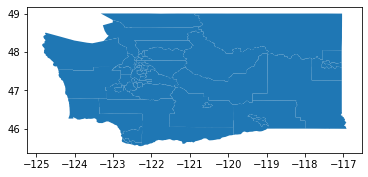

In [223]:
map_df.plot()

In [228]:
KC_cities = pd.read_csv("KC_cities.csv")